In [149]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/qz/b8m3h3g50qn7bgsms3cwkk6c0000gn/T/ipykernel_75723/3328983439.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_index = pd.date_range("2024-01-01 00:00", periods=minutes_in_day, freq="T")


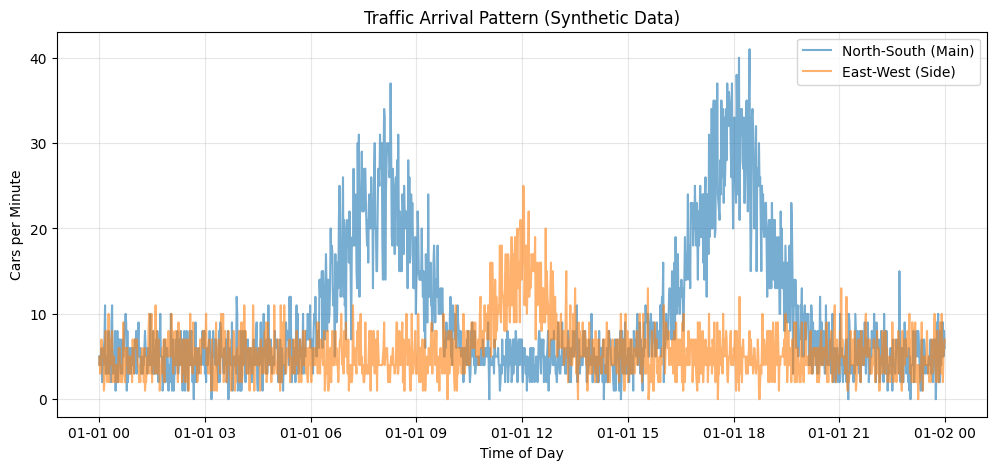

In [150]:
# Configuration
np.random.seed(42) # Fixed seed so we get the same "random" data every time
minutes_in_day = 24 * 60
time_index = pd.date_range("2024-01-01 00:00", periods=minutes_in_day, freq="T")

def get_expected_cars(minute_of_day, pattern_type):
    """
    Returns the average arrival rate (lambda) for a specific minute.
    """
    hour = minute_of_day / 60.0
    
    if pattern_type == 'main_road':
        # Main Road: Strong Morning (7-9) and Evening (17-19) peaks
        base_rate = 5
        morning_peak = 20 * np.exp(-0.5 * (hour - 8)**2)  # Gaussian peak at 8 AM
        evening_peak = 25 * np.exp(-0.5 * (hour - 18)**2) # Gaussian peak at 6 PM
        return base_rate + morning_peak + evening_peak
        
    elif pattern_type == 'side_road':
        # Side Road: Lower overall, small peak at noon
        base_rate = 5
        lunch_peak = 10 * np.exp(-1.0 * (hour - 12)**2)   # Peak at 12 PM
        return base_rate + lunch_peak

# Generate Data
data = []
for t in range(minutes_in_day):
    # 1. Get the "Average" rate for this specific minute (The Lambda)
    lambda_ns = get_expected_cars(t, 'main_road')
    lambda_ew = get_expected_cars(t, 'side_road')
    
    # 2. Add some random noise (Poisson Distribution)
    # This simulates that even if average is 20, sometimes 15 come, sometimes 25.
    actual_ns = np.random.poisson(lambda_ns)
    actual_ew = np.random.poisson(lambda_ew)
    
    data.append([time_index[t], actual_ns, actual_ew])

# Create DataFrame
df = pd.DataFrame(data, columns=["Date", "car_ns", "car_ew"])

# Save to CSV
df.to_csv("traffic_data.csv", index=False)

# --- PLOT THE DATA (Optional: To visualize what you are solving) ---
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["car_ns"], label="North-South (Main)", alpha=0.6)
plt.plot(df["Date"], df["car_ew"], label="East-West (Side)", alpha=0.6)
plt.title("Traffic Arrival Pattern (Synthetic Data)")
plt.xlabel("Time of Day")
plt.ylabel("Cars per Minute")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [152]:
data_set = []

def file_loader(file_name: str):
    with open(file_name, 'r', newline='') as csv_file:
        dict_reader = csv.DictReader(csv_file)
        for row in dict_reader:
            data_set.append(row)

file_loader("traffic_data.csv")

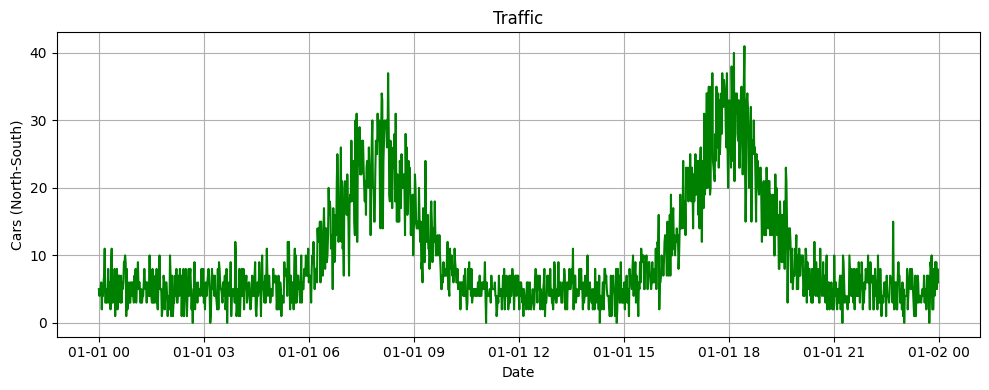

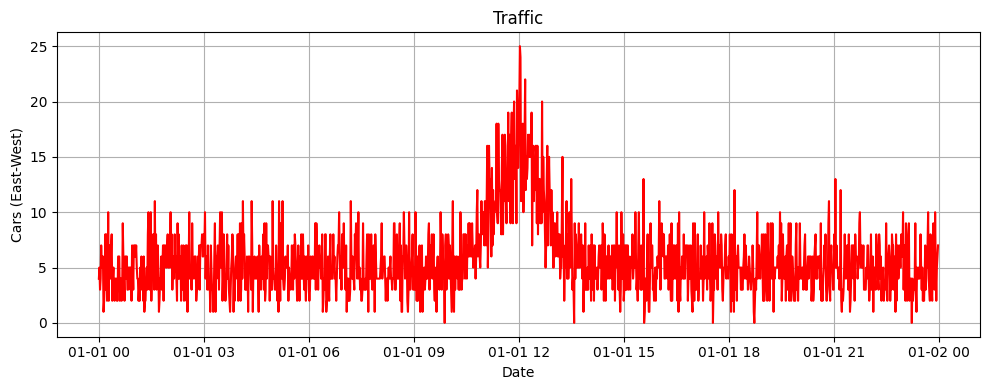

In [153]:
import datetime as dt

dates = [dt.datetime.strptime(data['Date'], '%Y-%m-%d %H:%M:%S') for data in data_set]
north_south = [float(data['car_ns']) for data in data_set]
east_west = [float(data['car_ew']) for data in data_set]

plt.figure(figsize=(10, 4))
plt.plot(dates, north_south, color='green')
plt.xlabel('Date')
plt.ylabel('Cars (North-South)')
plt.title('Traffic')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(dates, east_west, color='red')
plt.xlabel('Date')
plt.ylabel('Cars (East-West)')
plt.title('Traffic')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def car_per_half_hour(data_set):
    half_hour_stats = []
    for i in range(0, len(data_set)-30, 30):
        half_hour_data_set = data_set[i:i+30]

        sum_ns = 0
        sum_ew = 0

        for half_hour_data in half_hour_data_set:
            sum_ns += int(half_hour_data["car_ns"])
            sum_ew += int(half_hour_data["car_ew"])
        
        half_hour_stats.append([half_hour_data_set[0]["Date"], sum_ns, sum_ew])
    return half_hour_stats

def get_average(half_hour_stats):
    car_per_min_ns = half_hour_stats[:, 1].astype(float)/30
    car_per_min_ew = half_hour_stats[:, 2].astype(float)/30
    return [car_per_min_ns, car_per_min_ew]

def get_random_average(average_car_ns, average_car_ew):
    return np.array(np.random.poisson(average_car_ns), np.random.poisson(average_car_ew))

# def simulate_queue(half_hour_stats):
#     average_car_ns, average_car_ew = get_average(half_hour_stats)

#     car_ns = 0
#     car_ew = 0
#     for _ in range(30):
#         random_average = get_random_average(average_car_ns, average_car_ew)
#         car_ns += random_average[0]
#         car_ew += random_average[1]
#     return 


# half_hour_stats = np.array(car_per_half_hour(data_set))
# simulate_queue(half_hour_stats)

TypeError: Cannot construct a dtype from an array